# <font color='CC3D3D'>데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font',family='Malgun Gothic')

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectPercentile

import klib

import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

from sklearn.base import ClassifierMixin
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('data.csv' , encoding='cp949')
data_te = pd.read_csv('data_te.csv' , encoding='cp949')

In [3]:
cust_tr = data.CLNT_ID
cust_te = data_te.CLNT_ID 

In [4]:
train_f = data.drop(columns=['CLNT_ID']).fillna(0)
test_f = data_te.drop(columns=['CLNT_ID']).fillna(0)

y_target =  pd.read_csv('../dataset/y_train.csv').LABEL

In [5]:
train_f.shape, test_f.shape

((150000, 83), (113104, 83))

In [6]:
features = pd.concat([train_f, test_f]).reset_index(drop=True)
features

,총구매액,구매건수,평균구매액,최대구매액,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,평균대비구매비중,...,구매력지수,주 사용 기기,주 구매 지역,일,월,화,수,목,금,토
0,86500,2,43250,81000,1.000000,0.000000,1.000000,0.00000,0.0,1.896403,...,81000.0,mobile,Bucheon-si,0.0,0.00000,0.000,0.0,0.000000,0.0,0.0
1,1276000,16,79750,99000,0.125000,0.375000,0.625000,0.00000,0.0,27.974685,...,96500.0,mobile,Seoul,0.0,0.00000,0.125,0.0,0.000000,0.0,0.0
2,148900,7,21271,44900,0.857143,1.000000,0.000000,0.00000,0.0,3.264444,...,2900.0,mobile,Wanju-gun,0.0,0.00000,0.000,0.0,0.000000,0.0,0.0
3,42200,4,10550,12600,1.000000,1.000000,0.000000,0.00000,0.0,0.925182,...,94800.0,mobile,Gwangju,0.0,0.00000,0.000,0.0,0.000000,0.0,0.0
4,510180,32,15943,79000,0.250000,0.000000,0.281250,0.71875,0.0,11.185051,...,58000.0,mobile,Namyangju-si,0.0,0.15625,0.000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263099,205900,3,68633,120000,0.333333,0.000000,0.000000,1.00000,0.0,0.000000,...,0.0,mobile,Busan,0.0,0.00000,0.000,0.0,0.000000,0.0,0.0
263100,753220,13,57940,105000,0.307692,0.692308,0.307692,0.00000,0.0,0.000000,...,0.0,mobile,Seongnam-si,0.0,0.00000,0.000,0.0,0.692308,0.0,0.0
263101,601200,6,100200,100200,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,...,0.0,mobile,Anyang,0.0,0.00000,0.000,0.0,0.000000,0.0,0.0
263102,973000,112,8688,22000,0.000000,0.000000,1.000000,0.00000,0.0,0.000000,...,0.0,mobile,Gimcheon-si,0.0,0.00000,1.000,0.0,0.000000,0.0,0.0


# <font color='CC3D3D'> 피쳐엔지니어링

In [7]:
cat_features = features.select_dtypes(include=['object'])
num_features = features.select_dtypes(exclude='object')

features_cat_list = features.select_dtypes(include=['object']).columns.to_list()
features_num_list = features.select_dtypes(exclude='object').columns.to_list()

### 결측치확인

In [8]:
klib.missingval_plot(cat_features)

No missing values found in the dataset.


In [9]:
klib.missingval_plot(num_features)

No missing values found in the dataset.


### 이상치

In [10]:
num_features = num_features.apply(lambda x : x.clip(x.quantile(0.05), x.quantile(0.95)), axis=0)

### 스케일링

In [11]:
scaler= MinMaxScaler()

num_features = scaler.fit_transform(num_features)
num_features = pd.DataFrame(data = num_features, columns=features_num_list)
num_features

,총구매액,구매건수,평균구매액,최대구매액,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,평균대비구매비중,...,초고가상품구매율,구매당구매상품종류,구매력지수,일,월,화,수,목,금,토
0,0.029070,0.020408,0.219408,0.246528,1.000000,0.000000,1.000000,0.00000,0.0,0.057378,...,0.000000,1.000000,0.613636,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
1,0.554585,0.306122,0.452549,0.309028,0.125000,0.375000,0.625000,0.00000,0.0,0.846405,...,0.754702,0.464286,0.731061,0.0,0.000,0.602804,0.0,0.0,0.0,0.0
2,0.056638,0.122449,0.079019,0.121181,0.857143,1.000000,0.000000,0.00000,0.0,0.098769,...,0.000000,0.285714,0.021970,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
3,0.009499,0.061224,0.010539,0.009028,1.000000,1.000000,0.000000,0.00000,0.0,0.027992,...,0.000000,0.285714,0.718182,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
4,0.216250,0.632653,0.044987,0.239583,0.250000,0.000000,0.281250,0.71875,0.0,0.338416,...,0.000000,0.428571,0.439394,0.0,0.625,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263099,0.081820,0.040816,0.381540,0.381944,0.333333,0.000000,0.000000,1.00000,0.0,0.000000,...,0.582807,0.285714,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
263100,0.323624,0.244898,0.313239,0.329861,0.307692,0.692308,0.307692,0.00000,0.0,0.000000,...,0.418205,1.000000,0.000000,0.0,0.000,0.000000,0.0,1.0,0.0,0.0
263101,0.256462,0.102041,0.583172,0.313194,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,...,1.000000,0.285714,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
263102,0.420722,1.000000,0.000000,0.041667,0.000000,0.000000,1.000000,0.00000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.0,0.000,1.000000,0.0,0.0,0.0,0.0


### 정규화

In [12]:
num_features = PowerTransformer(standardize=True).fit_transform(num_features);num_features

array([[-0.8179193 , -0.92088863,  0.17468924, ..., -0.28229268,
        -0.2732357 , -0.28626523],
       [ 1.59848306,  1.126769  ,  1.08259072, ..., -0.28229268,
        -0.2732357 , -0.28626523],
       [-0.47443154,  0.1778195 , -0.81585053, ..., -0.28229268,
        -0.2732357 , -0.28626523],
       ...,
       [ 0.93177478,  0.00536314,  1.3806404 , ..., -0.28229268,
        -0.2732357 , -0.28626523],
       [ 1.399145  ,  1.85386794, -1.64511736, ..., -0.28229268,
        -0.2732357 , -0.28626523],
       [-1.23346259, -0.92088863, -1.47091996, ..., -0.28229268,
        -0.2732357 , -0.28626523]])

### 인코딩

In [13]:
features_c = pd.get_dummies(cat_features)
features_c

,주구매상품_2단우산,주구매상품_3단우산,주구매상품_BB/파운데이션/컴팩트류,주구매상품_DIY가구,주구매상품_DSLR,주구매상품_LCD,주구매상품_LED,주구매상품_OLED,주구매상품_PC부품,주구매상품_UHD,...,주 구매 지역_Yeongdeok-gun,주 구매 지역_Yeongdong-gun,주 구매 지역_Yeonggwang-gun,주 구매 지역_Yeongi-gun,주 구매 지역_Yeongju-si,주 구매 지역_Yeongwol-gun,주 구매 지역_Yeongyang-gun,주 구매 지역_Yeosu-si,주 구매 지역_Yesan-gun,주 구매 지역_Yongin-si
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
num_features = pd.DataFrame(data = num_features, columns=features_num_list)

In [15]:
num_features

,총구매액,구매건수,평균구매액,최대구매액,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,평균대비구매비중,...,초고가상품구매율,구매당구매상품종류,구매력지수,일,월,화,수,목,금,토
0,-0.817919,-0.920889,0.174689,0.424494,1.490176,-0.851163,1.123149,-0.518567,0.0,-0.049495,...,-0.640412,1.642653,1.441866,0.0,-0.312350,-0.306720,-0.294517,-0.282293,-0.273236,-0.286265
1,1.598483,1.126769,1.082591,0.700847,-0.051304,0.618574,0.470519,-0.518567,0.0,1.857660,...,1.658476,0.437520,1.559330,0.0,-0.312350,3.310038,-0.294517,-0.282293,-0.273236,-0.286265
2,-0.474432,0.177819,-0.815851,-0.358996,1.405550,1.393576,-1.082664,-0.518567,0.0,0.369780,...,-0.640412,-0.289591,-0.702540,0.0,-0.312350,-0.306720,-0.294517,-0.282293,-0.273236,-0.286265
3,-1.097568,-0.403946,-1.519116,-1.477192,1.490176,1.393576,-1.082664,-0.518567,0.0,-0.427874,...,-0.640412,-0.289591,1.548179,0.0,-0.312350,-0.306720,-0.294517,-0.282293,-0.273236,-0.286265
4,0.751726,1.683323,-1.142135,0.389895,0.452389,-0.851163,-0.285019,1.940799,0.0,1.466234,...,-0.640412,0.311645,1.176217,0.0,3.260925,-0.306720,-0.294517,-0.282293,-0.273236,-0.286265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263099,-0.204516,-0.647065,0.869676,0.957628,0.692050,-0.851163,-1.082664,1.979216,0.0,-0.868961,...,1.572032,-0.289591,-0.915946,0.0,-0.312350,-0.306720,-0.294517,-0.282293,-0.273236,-0.286265
263100,1.165307,0.900503,0.618685,0.780616,0.624668,1.129427,-0.219721,-0.518567,0.0,-0.868961,...,1.408202,1.642653,-0.915946,0.0,-0.312350,-0.306720,-0.294517,3.566375,-0.273236,-0.286265
263101,0.931775,0.005363,1.380640,0.717250,-0.834140,-0.851163,-1.082664,1.979216,0.0,-0.868961,...,1.717287,-0.289591,-0.915946,0.0,-0.312350,-0.306720,-0.294517,-0.282293,-0.273236,-0.286265
263102,1.399145,1.853868,-1.645117,-1.096061,-0.834140,-0.851163,1.123149,-0.518567,0.0,-0.868961,...,-0.640412,1.642653,-0.915946,0.0,-0.312350,3.310235,-0.294517,-0.282293,-0.273236,-0.286265


In [16]:
features_c

,주구매상품_2단우산,주구매상품_3단우산,주구매상품_BB/파운데이션/컴팩트류,주구매상품_DIY가구,주구매상품_DSLR,주구매상품_LCD,주구매상품_LED,주구매상품_OLED,주구매상품_PC부품,주구매상품_UHD,...,주 구매 지역_Yeongdeok-gun,주 구매 지역_Yeongdong-gun,주 구매 지역_Yeonggwang-gun,주 구매 지역_Yeongi-gun,주 구매 지역_Yeongju-si,주 구매 지역_Yeongwol-gun,주 구매 지역_Yeongyang-gun,주 구매 지역_Yeosu-si,주 구매 지역_Yesan-gun,주 구매 지역_Yongin-si
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 데이터 

In [17]:
cust_id=pd.concat([cust_tr,cust_te]).reset_index(drop=True)

In [18]:
features_1= pd.concat([num_features,features_c],axis=1).reset_index(drop=True)

In [19]:
features_1 = pd.concat([cust_id,features_1],axis=1)
features_1

,CLNT_ID,총구매액,구매건수,평균구매액,최대구매액,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,...,주 구매 지역_Yeongdeok-gun,주 구매 지역_Yeongdong-gun,주 구매 지역_Yeonggwang-gun,주 구매 지역_Yeongi-gun,주 구매 지역_Yeongju-si,주 구매 지역_Yeongwol-gun,주 구매 지역_Yeongyang-gun,주 구매 지역_Yeosu-si,주 구매 지역_Yesan-gun,주 구매 지역_Yongin-si
0,0,-0.817919,-0.920889,0.174689,0.424494,1.490176,-0.851163,1.123149,-0.518567,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.598483,1.126769,1.082591,0.700847,-0.051304,0.618574,0.470519,-0.518567,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6,-0.474432,0.177819,-0.815851,-0.358996,1.405550,1.393576,-1.082664,-0.518567,0.0,...,0,0,0,0,0,0,0,0,0,0
3,9,-1.097568,-0.403946,-1.519116,-1.477192,1.490176,1.393576,-1.082664,-0.518567,0.0,...,0,0,0,0,0,0,0,0,0,0
4,12,0.751726,1.683323,-1.142135,0.389895,0.452389,-0.851163,-0.285019,1.940799,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263099,263089,-0.204516,-0.647065,0.869676,0.957628,0.692050,-0.851163,-1.082664,1.979216,0.0,...,0,0,0,0,0,0,0,0,0,0
263100,263097,1.165307,0.900503,0.618685,0.780616,0.624668,1.129427,-0.219721,-0.518567,0.0,...,0,0,0,0,0,0,0,0,0,0
263101,263098,0.931775,0.005363,1.380640,0.717250,-0.834140,-0.851163,-1.082664,1.979216,0.0,...,0,0,0,0,0,0,0,0,0,0
263102,263099,1.399145,1.853868,-1.645117,-1.096061,-0.834140,-0.851163,1.123149,-0.518567,0.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
features_1.reset_index(drop=True)

,CLNT_ID,총구매액,구매건수,평균구매액,최대구매액,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,...,주 구매 지역_Yeongdeok-gun,주 구매 지역_Yeongdong-gun,주 구매 지역_Yeonggwang-gun,주 구매 지역_Yeongi-gun,주 구매 지역_Yeongju-si,주 구매 지역_Yeongwol-gun,주 구매 지역_Yeongyang-gun,주 구매 지역_Yeosu-si,주 구매 지역_Yesan-gun,주 구매 지역_Yongin-si
0,0,-0.817919,-0.920889,0.174689,0.424494,1.490176,-0.851163,1.123149,-0.518567,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.598483,1.126769,1.082591,0.700847,-0.051304,0.618574,0.470519,-0.518567,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6,-0.474432,0.177819,-0.815851,-0.358996,1.405550,1.393576,-1.082664,-0.518567,0.0,...,0,0,0,0,0,0,0,0,0,0
3,9,-1.097568,-0.403946,-1.519116,-1.477192,1.490176,1.393576,-1.082664,-0.518567,0.0,...,0,0,0,0,0,0,0,0,0,0
4,12,0.751726,1.683323,-1.142135,0.389895,0.452389,-0.851163,-0.285019,1.940799,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263099,263089,-0.204516,-0.647065,0.869676,0.957628,0.692050,-0.851163,-1.082664,1.979216,0.0,...,0,0,0,0,0,0,0,0,0,0
263100,263097,1.165307,0.900503,0.618685,0.780616,0.624668,1.129427,-0.219721,-0.518567,0.0,...,0,0,0,0,0,0,0,0,0,0
263101,263098,0.931775,0.005363,1.380640,0.717250,-0.834140,-0.851163,-1.082664,1.979216,0.0,...,0,0,0,0,0,0,0,0,0,0
263102,263099,1.399145,1.853868,-1.645117,-1.096061,-0.834140,-0.851163,1.123149,-0.518567,0.0,...,0,0,0,0,0,0,0,0,0,0


### 차원축소

In [21]:
from sklearn.decomposition import PCA

In [22]:
max_col=features_c.shape[1];max_col

1151

In [23]:
pca=PCA(n_components=max_col).fit(features_c)

In [24]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_col = np.argmax(cumsum >=0.99) +1
num_col

751

In [25]:
pca = PCA(n_components = num_col).fit_transform(features_c)
pca_f = pca

In [26]:
features_p = pd.concat([cust_id,pd.DataFrame(pca_f)], axis = 1);features_p

,CLNT_ID,0,1,2,3,4,5,6,7,8,...,741,742,743,744,745,746,747,748,749,750
0,0,-0.339913,-0.043047,-0.196291,-0.036671,-0.057841,-0.014197,-0.063214,-0.059691,-0.042032,...,0.001849,0.003021,-0.001047,-0.000237,-0.000252,0.000143,-0.000746,0.000390,0.000700,0.000324
1,1,0.639442,-0.140926,0.049087,-0.410968,0.807853,0.023804,0.095278,0.001785,0.030424,...,-0.000118,-0.000074,0.000061,0.000050,0.000080,0.000124,0.000002,-0.000175,0.000116,0.000018
2,6,-0.333173,-0.059397,-0.181667,-0.059294,-0.092196,-0.026249,-0.123965,-0.047447,-0.090748,...,0.000621,0.000169,0.000181,-0.000066,-0.000565,0.000841,0.000032,0.000957,-0.000261,0.000496
3,9,-0.368199,-0.043686,-0.243761,-0.042603,-0.070203,-0.017712,-0.069235,-0.116578,-0.050242,...,0.000344,-0.000013,-0.000306,0.000434,-0.000626,0.000035,0.000503,-0.000719,0.000340,-0.000423
4,12,-0.335185,-0.059694,-0.197247,-0.074366,-0.126486,-0.033189,-0.195126,-0.015445,-0.463347,...,-0.005173,-0.000740,0.001174,-0.000379,0.001601,0.001466,0.001210,0.003234,-0.000073,-0.002220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263099,263089,-0.579188,-0.191282,0.764963,-0.404056,0.764512,0.031431,0.098687,0.022165,0.023629,...,-0.005692,0.004906,-0.001459,0.004892,-0.005328,0.000009,0.004526,-0.014776,0.005975,-0.000732
263100,263097,-0.335532,-0.148650,-0.204830,-0.369566,0.780144,0.023695,0.080867,-0.072003,0.000290,...,-0.000190,-0.000799,0.000228,0.000976,0.000752,-0.000061,-0.000842,0.000116,0.002420,0.000139
263101,263098,-0.353386,0.677740,-0.160095,0.111224,0.059979,0.005573,-0.000490,-0.065175,-0.014079,...,-0.000287,0.000709,-0.000206,-0.000086,0.000520,0.000077,-0.000622,-0.000589,-0.000233,0.000307
263102,263099,-0.347546,1.307573,-0.103874,0.239239,0.166736,0.021501,0.059150,-0.048717,0.015064,...,0.000852,0.001125,0.000166,0.000475,-0.000073,0.000249,0.000303,-0.000425,-0.000056,0.000488


In [27]:
features = pd.concat([features_p, num_features] , axis =1)
del features['CLNT_ID'];features

,0,1,2,3,4,5,6,7,8,9,...,초고가상품구매율,구매당구매상품종류,구매력지수,일,월,화,수,목,금,토
0,-0.339913,-0.043047,-0.196291,-0.036671,-0.057841,-0.014197,-0.063214,-0.059691,-0.042032,-0.055861,...,-0.640412,1.642653,1.441866,0.0,-0.312350,-0.306720,-0.294517,-0.282293,-0.273236,-0.286265
1,0.639442,-0.140926,0.049087,-0.410968,0.807853,0.023804,0.095278,0.001785,0.030424,0.029703,...,1.658476,0.437520,1.559330,0.0,-0.312350,3.310038,-0.294517,-0.282293,-0.273236,-0.286265
2,-0.333173,-0.059397,-0.181667,-0.059294,-0.092196,-0.026249,-0.123965,-0.047447,-0.090748,-0.184916,...,-0.640412,-0.289591,-0.702540,0.0,-0.312350,-0.306720,-0.294517,-0.282293,-0.273236,-0.286265
3,-0.368199,-0.043686,-0.243761,-0.042603,-0.070203,-0.017712,-0.069235,-0.116578,-0.050242,-0.080683,...,-0.640412,-0.289591,1.548179,0.0,-0.312350,-0.306720,-0.294517,-0.282293,-0.273236,-0.286265
4,-0.335185,-0.059694,-0.197247,-0.074366,-0.126486,-0.033189,-0.195126,-0.015445,-0.463347,0.775827,...,-0.640412,0.311645,1.176217,0.0,3.260925,-0.306720,-0.294517,-0.282293,-0.273236,-0.286265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263099,-0.579188,-0.191282,0.764963,-0.404056,0.764512,0.031431,0.098687,0.022165,0.023629,0.032590,...,1.572032,-0.289591,-0.915946,0.0,-0.312350,-0.306720,-0.294517,-0.282293,-0.273236,-0.286265
263100,-0.335532,-0.148650,-0.204830,-0.369566,0.780144,0.023695,0.080867,-0.072003,0.000290,0.015160,...,1.408202,1.642653,-0.915946,0.0,-0.312350,-0.306720,-0.294517,3.566375,-0.273236,-0.286265
263101,-0.353386,0.677740,-0.160095,0.111224,0.059979,0.005573,-0.000490,-0.065175,-0.014079,-0.023123,...,1.717287,-0.289591,-0.915946,0.0,-0.312350,-0.306720,-0.294517,-0.282293,-0.273236,-0.286265
263102,-0.347546,1.307573,-0.103874,0.239239,0.166736,0.021501,0.059150,-0.048717,0.015064,0.032753,...,-0.640412,1.642653,-0.915946,0.0,-0.312350,3.310235,-0.294517,-0.282293,-0.273236,-0.286265


### 피쳐선택

100%|███████████████████████████████████████████████████████████████████████████████| 50/50 [1:34:23<00:00, 113.27s/it]


(70, -1.25742151192)


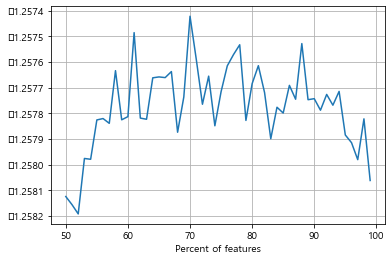

In [28]:
features = pd.concat([pd.concat([cust_tr, cust_te]).reset_index(drop=True), features], axis=1)
X_train = features.query('CLNT_ID in @cust_tr').drop('CLNT_ID', axis=1)
X_test = features.query('CLNT_ID in @cust_te').drop('CLNT_ID', axis=1)

model = LogisticRegression(random_state=0)
sfk = StratifiedKFold(n_splits = 5)

cv_scores = [] 
for p in tqdm(range(50,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X_train, y_target)    
    cv_score = cross_val_score(model, X_new, y_target, scoring='neg_log_loss', cv=sfk).mean()
    cv_scores.append((p,cv_score))

best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [29]:
fs = SelectPercentile(percentile=best_score[0]).fit(X_train, y_target)
X_train = fs.transform(X_train)
X_test = fs.transform(X_test)

print(X_train.shape, X_test.shape)

(150000, 581) (113104, 581)


In [30]:
# 데이터파일 저장
X_train = pd.DataFrame(X_train)
X_train.to_csv('train.csv')

X_test = pd.DataFrame(X_test)
X_test.to_csv('test.csv')

### END